**Nom et Prénom :**  Othmane OUKBIL

(Ce mini-projet peut être faire seul ou en binôme)

# Mini projet :  Méthode de gradient à pas spectral
----
Le but de ce mini-projet est de programmer, valider et expérimenter la méthode de gradient avec pas spectral.

N.B: N'hésitez pas à diviser vos codes en plusieurs cellules quand c'est possible pour faciliter leurs lectures et éxecutions.

----
On introduit les deux notations :

$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$

**Etape 1**

Reprendre un algorithme de minimisation par gradient à pas variable (ou à pas fixe) :

\begin{equation}
u^{(0)} \textrm{ donné}; \quad u^{(k+1)} = u^{(k)} - \rho_k \nabla J(u^{(k)})
\end{equation}


> Modifier cet algorithme de sorte à ce que le pas $\rho_k$ soit donné par l'une des deux variantes, dites de Barzilaï et Borwein :

$$
\rho^1_k = \dfrac{(s^{(k-1)} ,s^{(k-1)})}{(y^{(k-1)} ,s^{(k-1)})} ;
\qquad
\rho^2_k = \dfrac{(s^{(k-1)} ,y^{(k-1)})}{(y^{(k-1)} ,y^{(k-1)})};
\quad
\text{ pour } k\geq 1
$$
Cet algorithme (noté BB1 et BB2 selon variante) nécessite donc un pré-calcul du vecteur $u^{(1)}$ avec un pas initial $\rho_0$. A vous de choisir ce premier pas $\rho_0$ comme vous voulez.


In [ ]:
import numpy as np

In [ ]:
## implémenter l'algorithme BB1
def JXBB1(N):
    tol = 1.e-8  # tolérance sur la norme du gradient
    Kmax = 2000  # nombre max d'itérations
    rho = 0.1
    k = 0
    u0 = np.zeros(N)
    grad_u0 = JX(u0)[1]
    u1 = u0 - np.dot(rho, grad_u0)
    uk_1 = u0
    uk = u1

    for k in range(Kmax):
        gradk_1 = JX(uk_1)[1]
        gk = JX(uk)[1]
        sk = uk - uk_1
        yk = gk - gradk_1
        rho = np.dot(sk, sk) / np.dot(yk, sk)
        uk_1 = uk
        uk = uk - rho * JX(uk)[1]
        if np.linalg.norm(JX(uk)[1]) < tol:
            break

    return uk, k


In [ ]:
## implémenter l'algorithme BB2
def JXBB2(N):
    tol = 1.e-8
    max_iter= 2000
    rho = 0.1
    k = 0
    u_0 = np.zeros(N)
    grad_u0 = JX(u_0)[1]
    u_k = u_0 - np.dot(rho, grad_u0)
    uk_1 = u_0
    for k in range(max_itera):
        gradk_1 = JX(uk_1)[1]
        grad_k = JX(u_k)[1]
        s_k = u_k - uk_1
        y_k = grad_k - gradk_1
        rho = np.dot(s_k, y_k) / np.dot(y_k, y_k)
        uk_1 = u_k
        u_k = u_k - rho * JX(u_k)[1]
        if np.linalg.norm(JX(u_k)[1]) < tol:
            break

    return u_k, k


----
**Etape 2**

> Effectuer les tests de validation pour les fonctions quadratiques suivantes ($N=10$):

$$J_1(v) = \sum_{i=1}^{i=N}{(v_i - 1)^2}, \quad J_2(v) = \sum_{i=1}^{i=N}{(v_i - i)^2}$$


In [ ]:
# Compléter ici
def J1(v):
    N = len(v)
    ones = np.ones(N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]
def J2(v):
    N = len(v)
    l = np.array([i for i in range(1,N+1)])
    return [np.dot(v-l, v-l), 2*(v-l)]
def J1BB1(N):
    tol = 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = J1(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    for k in range(Kmax):
        k=k+1
        gradk_1= J1(uk_1)[1]
        grad_k=J1(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, sk)/ np.dot(yk,sk)
        uk_1 = uk
        uk = uk - ro*J1(uk)[1]
        if np.linalg.norm(J1(uk)[1]) < tol:
            break

    return uk, k
def J2BB1(N):
    tol= 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = J2(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    for k in range(Kmax):
        k=k+1
        gradk_1= J2(uk_1)[1]
        grad_k=J2(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, sk)/ np.dot(yk,sk)
        uk_1 = uk
        uk = uk - ro*J2(uk)[1]
        if np.linalg.norm(J2(uk)[1]) < tol:
            break

    return uk, k
def J1BB2(N):
    tol = 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = J1(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    for k in range(Kmax):
        k=k+1
        gradk_1= J1(uk_1)[1]
        grad_k=J1(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, yk)/ np.dot(yk,yk)
        uk_1 = uk
        uk = uk - ro*J1(uk)[1]
        if np.linalg.norm(J1(uk)[1]) < tol:
            break

    return uk, k
def J2BB2(N):
    tol= 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = J2(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    for k in range(Kmax):
        k=k+1
        gradk_1= J2(uk_1)[1]
        grad_k=J2(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, yk)/ np.dot(yk,yk)
        uk_1 = uk
        uk = uk - ro*J2(uk)[1]
        if np.linalg.norm(J2(uk)[1]) < tol:
            break
    return uk, k

In [ ]:
J1BB1(10)


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 1)

In [ ]:
J2BB1(10)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 1)

In [ ]:
J1BB2(10)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 1)

In [ ]:
J2BB2(10)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 1)

----
**Etape 3**

On considère les fonctions suivantes (en dimension $N$):

$$
J_5(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^2}, \quad \quad \quad
J_6(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^4}
$$

avec $f=(1,\ldots,1)$ et la matrice $A = {\rm tridiag}[-1, 2, -1]$ et la fonction de Rosenbrock

$$
J_R(v) = \sum_{i=1}^{N-1}(v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i - 1)^2
$$

> Minimiser les fonctions $J_5$, $J_6$  et $J_R$ par BB1 et par BB2 (pour $N=10, 20, 40$), et comparer les performances de ces deux variantes en traçant sur un même graphique les courbes BB1 et BB2 de $J(u^{(k)})$ en fonction des itérations $k$.

In [ ]:
# Compléter ici
def J5(v):
    n = len (v)
    A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    f = np.ones(len(v))
    return 0.5*np.dot(np.dot(A,v),v) - np.dot(f,v) + np.dot(v,v) , np.dot(A,v) - f + 2*v

def J6(v):
    n = len (v)
    A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    f = np.ones(len(v))
    grad = np.zeros(n)
    i=0
    for i in range(n):
        grad[i] = 4 * v[i]**3

    return 0.5*np.dot(np.dot(A,v),v) - np.dot(f,v) + sum([i**4 for i in v]) , np.dot(A,v) - f + grad

def JR(v):
    N = len (v)
    v1 = v[1:N] - v[0:N-1]*v[0:N-1]
    v2 = v[0:N-1] - np.ones(N-1)
    d1 = np.array([-4*v[0]*(v[1] - v[0]**2) + 2*(v[0]-1)])
    di = 2*(v[1:N-1] - v[0:N-2]*v[0:N-2]) - 4 * v[1:N-1]*(v[2:N] - v[1:N-1]*v[1:N-1]) + 2* (v[1:N-1] - np.ones(N-2))
    dN = np.array([2 *(v[N-1] - v[N-2]**2)])
    return [np.dot(v1,v1)+ np.dot(v2,v2), np.concatenate((d1, di, dN), axis=0, out=None, dtype=None)]

def J5BB1(N):
    tol = 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = J5(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    L=[]
    L.append(J5(u0)[0])
    L.append(J5(u1)[0])
    for k in range(Kmax):
        k=k+1
        gradk_1= J5(uk_1)[1]
        grad_k=J5(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, sk)/ np.dot(yk,sk)
        uk_1 = uk
        uk = uk - ro*J5(uk)[1]
        L.append(J5(uk)[0])
        if np.linalg.norm(J5(uk)[1]) < tol:
            break

    return uk, k, L
def J6BB1(N):
    tol = 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = J6(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    L=[]
    L.append(J6(u0)[0])
    L.append(J6(u1)[0])
    for k in range(Kmax):
        k=k+1
        gradk_1= J6(uk_1)[1]
        grad_k=J6(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, sk)/ np.dot(yk,sk)
        uk_1 = uk
        uk = uk - ro*J6(uk)[1]
        L.append(J6(uk)[0])
        if np.linalg.norm(J6(uk)[1]) < tol:
            break

    return uk, k, L
def JRBB1(N):
    tol = 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = JR(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    L=[]
    L.append(JR(u0)[0])
    L.append(JR(u1)[0])
    for k in range(Kmax):
        k=k+1
        gradk_1= JR(uk_1)[1]
        grad_k=JR(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, sk)/ np.dot(yk,sk)
        uk_1 = uk
        uk = uk - ro*JR(uk)[1]
        L.append(JR(uk)[0])
        if np.linalg.norm(JR(uk)[1]) < tol:
            break

    return uk, k, L
def J5BB2(N):
    tol = 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = J5(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    L=[]
    L.append(J5(u0)[0])
    L.append(J5(u1)[0])
    for k in range(Kmax):
        k=k+1
        gradk_1= J5(uk_1)[1]
        grad_k=J5(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, yk)/ np.dot(yk,yk)
        uk_1 = uk
        uk = uk - ro*J5(uk)[1]
        L.append(J5(uk)[0])
        if np.linalg.norm(J5(uk)[1]) < tol:
            break
    return uk, k, L
def J6BB2(N):
    tol = 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = J6(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    L=[]
    L.append(J6(u0)[0])
    L.append(J6(u1)[0])
    for k in range(Kmax):
        k=k+1
        gradk_1= J6(uk_1)[1]
        grad_k=J6(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, yk)/ np.dot(yk,yk)
        uk_1 = uk
        uk = uk - ro*J6(uk)[1]
        L.append(J6(uk)[0])
        if np.linalg.norm(J6(uk)[1]) < tol:
            break
    return uk, k, L
def JRBB2(N):
    tol = 1.e-8
    Kmax = 2000
    ro = 0.1
    k=0
    u0 = np.zeros(N)
    grad_u0 = JR(u0)[1]
    u1= u0 - np.dot(ro,grad_u0)
    uk_1 = u0
    uk= u1
    k=1
    L=[]
    L.append(JR(u0)[0])
    L.append(JR(u1)[0])
    for k in range(Kmax):
        k=k+1
        gradk_1= JR(uk_1)[1]
        grad_k=JR(uk)[1]
        sk = uk - uk_1
        yk = grad_k - gradk_1
        ro = np.dot(sk, yk)/ np.dot(yk,yk)
        uk_1 = uk
        uk = uk - ro*JR(uk)[1]
        L.append(JR(uk)[0])
        if np.linalg.norm(JR(uk)[1]) < tol:
            break

    return uk, k, L


[0.0, -0.8899999999999999, -2.2990909090909084, -2.307374486791279, -2.316031156504305, -2.3169610974360864, -2.3169866780846147, -2.3169874842612663, -2.3169877268258863, -2.3169877403800836, -2.3169877405550072, -2.3169877407763066, -2.3169877408048207, -2.316987740805298, -2.3169877408056037, -2.316987740805605, -2.3169877408056028, -2.3169877408056045]
[0.0, -0.8899999999999999, -2.29624, -2.3092485173651065, -2.316335981514173, -2.3169722156021777, -2.3169863548053518, -2.3169872987395213, -2.3169877155871297, -2.3169877403077663, -2.316987740503994, -2.316987740786999, -2.3169877408054442, -2.316987740805553, -2.3169877408056, -2.316987740805603, -2.316987740805603, -2.3169877408056037]


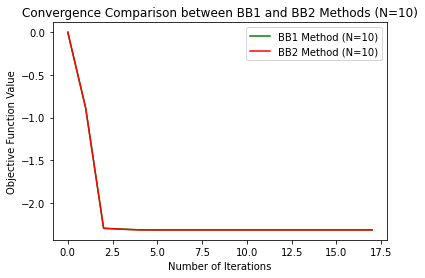

[0.0, -1.7900000000000005, -4.79453514739229, -4.80329851467214, -4.815623206061949, -4.816943767230578, -4.816985573124811, -4.816986931971947, -4.8169872705983385, -4.8169872967350775, -4.816987296863709, -4.816987298080905, -4.816987298105041, -4.816987298107249, -4.8169872981086215, -4.816987298108624, -4.816987298108625, -4.816987298108624, -4.816987298108625]
[0.0, -1.7900000000000005, -4.792222222222219, -4.804979261581202, -4.816095475428525, -4.816961739210628, -4.816985245267649, -4.816986795965189, -4.81698726223349, -4.81698729599738, -4.816987297098675, -4.816987298049807, -4.816987298098418, -4.816987298104463, -4.816987298108622, -4.816987298108624, -4.816987298108628, -4.816987298108624]


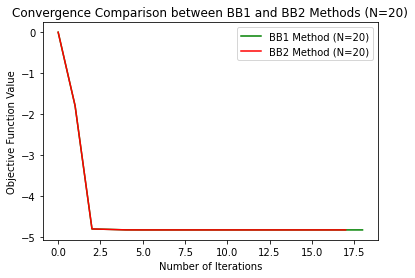

[0.0, -2.6900000000000013, -7.29301768990634, -7.301590916091026, -7.315482461659692, -7.316936665144095, -7.316985127153314, -7.31698683299391, -7.316987266125351, -7.316987296419757, -7.316987296461762, -7.31698729809018, -7.3169872981051265, -7.316987298106822, -7.316987298107778, -7.316987298107777, -7.316987298107782, -7.316987298107783, -7.316987298107782]
[0.0, -2.6900000000000013, -7.291207100591709, -7.302956614409903, -7.316008822200567, -7.316956610224004, -7.31698470145469, -7.316986706382166, -7.316987267253558, -7.316987296328019, -7.316987297125417, -7.316987298071408, -7.316987298096344, -7.316987298103817, -7.316987298107777, -7.316987298107783, -7.316987298107784, -7.316987298107784]


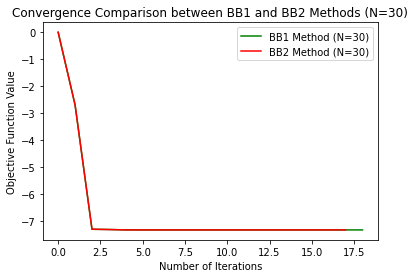

In [ ]:
#For the function J5
import matplotlib.pyplot as plt

L1 = []
L2 = []
for N in [10, 20, 30]:
    L1 = J5BB1(N)[2]
    print(L1)
    L2 = J5BB2(N)[2]
    print(L2)
    plt.plot(range(len(L1)), L1, label=f'BB1 Method (N={N})', color='green')
    plt.plot(range(len(L2)), L2, label=f'BB2 Method (N={N})', color='red')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Objective Function Value')
    plt.title(f'Convergence Comparison between BB1 and BB2 Methods (N={N})')
    plt.legend()
    plt.show()


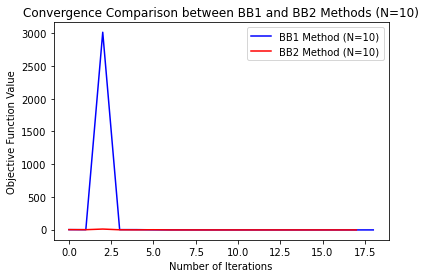

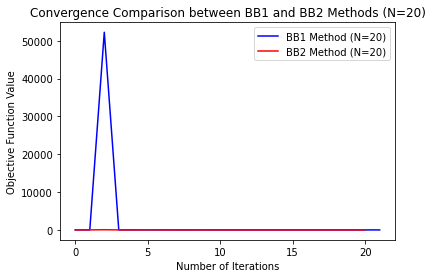

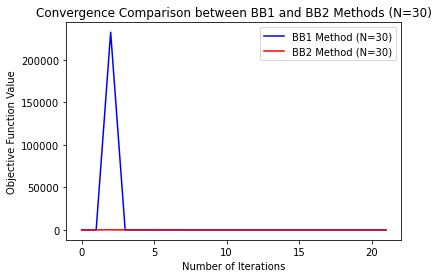

In [ ]:


L1 = []
L2 = []
for N in [10, 20, 30]:
    L1 = J6BB1(N)[2]
    L2 = J6BB2(N)[2]

    plt.plot(range(len(L1)), L1, label=f'BB1 Method (N={N})', color='blue')
    plt.plot(range(len(L2)), L2, label=f'BB2 Method (N={N})', color='red')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Objective Function Value')
    plt.title(f'Convergence Comparison between BB1 and BB2 Methods (N={N})')
    plt.legend()
    plt.show()

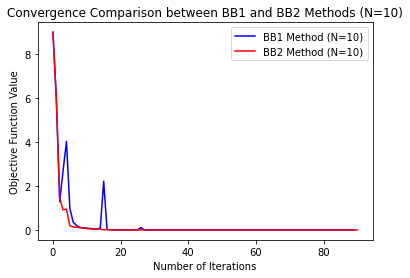

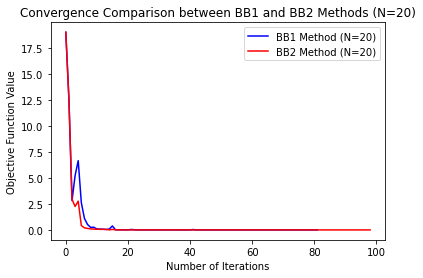

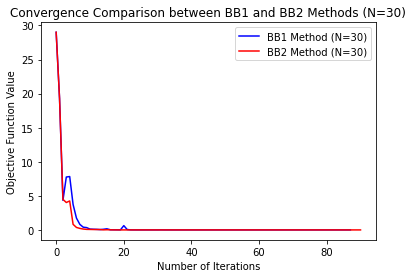

In [ ]:


L1 = []
L2 = []
for N in [10, 20, 30]:
    L1 = JRBB1(N)[2]
    L2 = JRBB2(N)[2]

    # Plotting
    plt.plot(range(len(L1)), L1, label=f'BB1 Method (N={N})', color='blue')
    plt.plot(range(len(L2)), L2, label=f'BB2 Method (N={N})', color='red')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Objective Function Value')
    plt.title(f'Convergence Comparison between BB1 and BB2 Methods (N={N})')
    plt.legend()
    plt.show()

**Etape 4**

> Comparer pour la fonction $J_R$ les performances des méthodes BB1 (ou BB2) et de l'algorithme NLCG (Fletcher-Reeves à pas constant) développé en TP2 : Comme avant, cette comparaison doit être faite en traçant les courbes de $J(u^{(k)})$ en fonction des itérations $k$ pour les différents algorithmes.

> Refaire la même chose pour la fonction $J_H$ (du TP1).

On rappelle que $J_H$ est donnée par $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$.

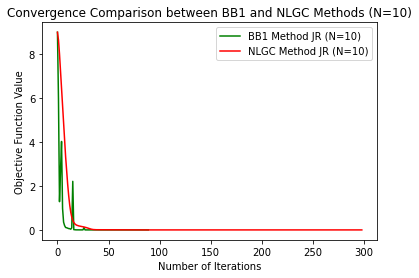

In [ ]:
# Compléter ici
def JRNLGC(N,ro_k=0.01):
    L = []
    u_0 = np.zeros(N)
    d_u0 = JR(u_0)[1]
    u_k = u_0
    d_k = d_u0
    i=0
    L.append(JR(u_k)[0])
    while np.linalg.norm(d_k) > 10**-7:
        G_k = JR(u_k)[1]
        u_k = u_k - np.dot(ro_k,d_k)
        L.append(JR(u_k)[0])
        G_k1 = JR(u_k)[1]

        beta_k = np.dot(G_k1, G_k1) / np.dot(G_k,G_k)

        d_k = G_kplus1 + np.dot(beta_k, d_k)
        i+=1
    return u_k, i, L
#Pour JR BB1 vs NLGC N=10 et RO = 0.01

def JRNLGC(N,ro_k=0.01):
  L = []
  u_0 = np.zeros(N)
  d_u0 = JR(u_0)[1]
  u_k = u_0
  d_k = d_u0
  i=0
  L.append(JR(u_k)[0])
  while np.linalg.norm(d_k) > 10**-7:
    G_k = JR(u_k)[1]
    u_k = u_k - np.dot(ro_k,d_k)
    L.append(JR(u_k)[0])
    G_kplus1 = JR(u_k)[1]

    beta_k = np.dot(G_kplus1, G_kplus1) / np.dot(G_k,G_k)

    d_k = G_kplus1 + np.dot(beta_k, d_k)
    i+=1
  return u_k, i, L

L1 = []
L2 = []
N=10
L1 = JRBB1(N)[2]
L2 = JRNLGC(N)[2]

# Plotting
plt.plot(range(len(L1)), L1, label=f'BB1 Method JR (N={N})', color='green')
plt.plot(range(len(L2)), L2, label=f'NLGC Method JR (N={N})', color='red')

plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')
plt.title(f'Convergence Comparison between BB1 and NLGC Methods (N={N})')
plt.legend()
plt.show()

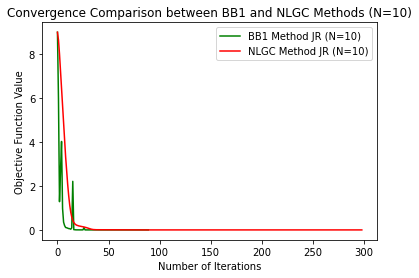

In [ ]:


def JRNLGC(N,ro_k=0.01):
    L = []
    u_0 = np.zeros(N)
    d_u0 = JR(u_0)[1]
    u_k = u_0
    d_k = d_u0
    i=0
    L.append(JR(u_k)[0])
    while np.linalg.norm(d_k) > 10**-7:
        G_k = JR(u_k)[1]
        u_k = u_k - np.dot(ro_k,d_k)
        L.append(JR(u_k)[0])
        G_k1 = JR(u_k)[1]

        b_k = np.dot(G_k1, G_k1) / np.dot(G_k,G_k)

        d_k = G_k1 + np.dot(b_k, d_k)
        i+=1
    return u_k, i, L

L1 = []
L2 = []
N=10
L1 = JRBB1(N)[2]
L2 = JRNLGC(N)[2]

# Plotting
plt.plot(range(len(L1)), L1, label=f'BB1 Method JR (N={N})', color='green')
plt.plot(range(len(L2)), L2, label=f'NLGC Method JR (N={N})', color='red')

plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')
plt.title(f'Convergence Comparison between BB1 and NLGC Methods (N={N})')
plt.legend()
plt.show()